# Scripting landmark warps

Landmark warping can be scripted using the **mwarp1d.warp_landmark** function.

Let’s first run an example script then consider the details:

In [1]:
%matplotlib inline

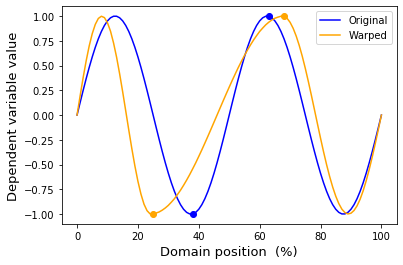

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import mwarp1d


#define a plotting function (for re-use below)
def plot_warp_results(y, yw, x0, x1):
    plt.figure()
    ax    = plt.axes()
    c0,c1 = 'blue', 'orange'
    ax.plot(y,  color=c0, label='Original')
    ax.plot(yw, color=c1, label='Warped')
    [ax.plot(xx, y[xx],  'o', color=c0)  for xx in x0]
    [ax.plot(xx, yw[xx], 'o', color=c1)    for xx in x1]
    ax.legend()
    ax.set_xlabel('Domain position  (%)', size=13)
    ax.set_ylabel('Dependent variable value', size=13)
    plt.show()


#define landmarks:
Q    = 101       #domain size
x0   = [38, 63]  #initial landmark location(s)
x1   = [25, 68]  #final landmark location(s)


#apply warp:
y    = np.sin( np.linspace(0, 4*np.pi, Q) )  #an arbitary 1D observation
yw   = mwarp1d.warp_landmark(y, x0, x1)      #warped 1D observation


#plot:
plot_warp_results(y, yw, x0, x1)

The input arguments to warp_landmark include:

* **y** — the 1D data to be warped
* **x0** — initial landmark positions
* **x1** — final landmark positions

Let’s consider what happens when only a single landmark is specified:

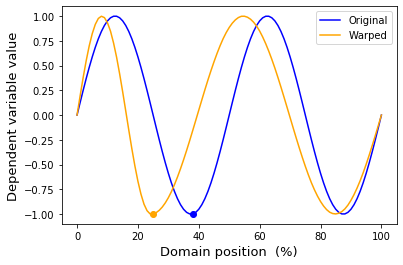

In [3]:
x0   = [38]
x1   = [25]
yw   = mwarp1d.warp_landmark(y, x0, x1)
plot_warp_results(y, yw, x0, x1)

Note that using a single landmark causes the entire domain to be warped.

To restrict warping effects to a local area, add more landmarks, like this:

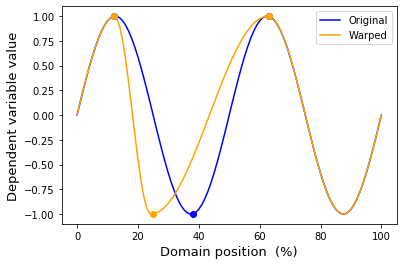

In [4]:
x0   = [12, 38, 63]
x1   = [12, 25, 63]
yw   = mwarp1d.warp_landmark(y, x0, x1)
plot_warp_results(y, yw, x0, x1)